# "R-squared: Statistical and Machine Learning interpretation"
> "Regression evaluation metrics, interpretation and pitfalls."
- toc: false
- comments: false
- badges: false
- categories: [Regression, Evaluation Metric]

In [51]:
#hide
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = load_boston()
x = data['data']
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)

### R-squared

R-squared ($R^2$), also known as the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) is a measure to evaluate the overall fit of a linear model i.e how close the fitted regression line is to the observed data.

One of the most common metrics for evaluating the performance of regression models, also is a point of confusion and often leads to misinterpreted results. I believe this is due to the difference in explanation of the metric from statistics and machine learning sources. These 

In this post we'll derive R-squared using both approaches and also implement them to check the performance of a model on a toy dataset. The Boston House prices dataset and a Random Forest Regressor are used to illustrate the concepts in the code snippets.

#### Statistical Definition: 
 Defines R-squared as the proportion of variance explained, meaning the proportion of variance of the target y that is explained by the model. It is also defined as comparing the predictions of a model to a simple **null model**, one that always predicts the mean of the target variable.

The R-squared is defined as a proportion with a range of [0, 1] where a model that perfectly explains the variation in the target has a score of 1 and a score of 0 represents a model that explains none of the variation in the target.

However, these definitions don’t talk about how R-squared **can be negative** if the fit of the model is worse than that of the null model. In fact, using R-squared in the machine learning context where we care about generalising i.e. predicting on unseen or out of sample data the R-squared is often negative and problematic.

For a model $h_\theta$,
consider the Random variables $y$ (Target) and $\hat{y}$ (predicted values by model).

The **Residual** of the error is the difference between the actual value of the target and the predictions of the model.

$$e_i = y_i - \hat{y_i}$$

The variance of a random variable x is the measure of the spread of its distribution in the case of a population or more generally it is the measure of how far on average the observed value of a random variable is from its expected value.

$$Var(x) = E[(x - E(x))^2]$$

which for a population with n data points:

$$\sigma^2 = \frac{1}{n}\sum{(x_i - \bar{x})^2}$$

and for a sample, the unbiased estimate of the variance:

$$S^2 = \frac{1}{n-1}\sum{(x_i - \bar{x})^2} $$

and, R-squared from its definition as a proportion of explained variance is 1 minus the proportion of unexplained variance,

$$ R^2 = 1 - \frac{S_{e}^{2}(\text{Error from fitted model})}{S_{y}^{2}(\text{From data points})} $$

**When and why is R-squared negative.**

In the statistical learning concepts we do not not care about generalising to unseen data. In the case of machine learning the model's fit can be arbitrarily worse than the null model and the R-squared will be negative as a result. For the training set the R-squared in bounded by [0, 1] but not when we present the model unseen data.

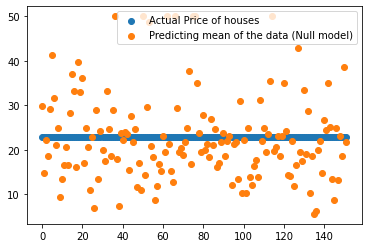

R^2 for null model : 0.0
MSE for null model : 9.757620233144245


In [86]:
#hide_input
plt.scatter(np.arange(len(x_test)), np.repeat(np.mean(y_test), y_test.shape[0]), label = 'Actual Price of houses')
plt.scatter(np.arange(len(x_test)), y_test, label = 'Predicting mean of the data (Null model)')
plt.legend()
plt.show()

print(f'R^2 for null model : {r2_score(y_test, np.repeat(np.mean(y_test), y_test.shape[0]))}')
print(f'MSE for null model : {mean_squared_error(y_test, np.repeat(np.mean(y_test), y_test.shape[0]), squared=False)}')

Shifting the prediction of mean by a value of -10.

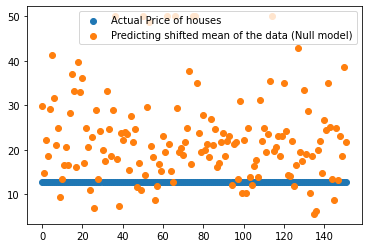

R^2 for null model : -1.0502971264840726
MSE for null model : 13.97179847457964


In [92]:
#hide_input
plt.scatter(np.arange(len(x_test)), np.repeat(np.mean(y_test) - 10, y_test.shape[0]), label = 'Actual Price of houses')
plt.scatter(np.arange(len(x_test)), y_test, label = 'Predicting shifted mean of the data (Null model)')
plt.legend()
plt.show()

print(f'R^2 for null model : {r2_score(y_test, np.repeat(np.mean(y_test) - 10, y_test.shape[0]))}')
print(f'MSE for null model : {mean_squared_error(y_test, np.repeat(np.mean(y_test) - 10, y_test.shape[0]), squared=False)}')

#### Machine Learning Definition:

 Focuses on the definition of the error estimate in terms of the sum of squared residual errors (SSE), the mean squared error (MSE) is simply the SSE divided by the total samples of the data.
 
 Ultimately gives us the form :

$$R^2 = 1 -  \frac{MSE_{\text{Error from fitted model}}}{MSE_{\bar{y}(\text{From data points})} }$$

To conclude, 
The R2 score, or coefficient of determination is a common regression, which measures how well a model performs relative to a simple mean of the target values. It is often thought of as the amount of variance explained by a model. Where,\
R2 = 1 indicates a perfect match, \
R2 = 0 indicates the model does no better than simply taking the mean of the data, \
and negative values mean even worse models.

Illustrating the out-of-sample R^2 of predictions made by a Random Forest Regressor :

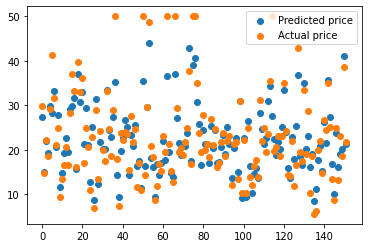

In [103]:
#hide_input
preds = clf_rf.predict(x_test)
plt.scatter(np.arange(len(x_test)), preds, label = 'Predicted price')
plt.scatter(np.arange(len(x_test)), y_test, label = 'Actual price')
plt.legend()
plt.show()

In [97]:
#hide_input
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=100, criterion='mse',
                               max_depth=None,
                               min_samples_split=2, min_samples_leaf=1,
                               max_features='log2', bootstrap=True, oob_score=True, n_jobs=-1, verbose=0)
clf_rf.fit(x_train, y_train)
# train R2 baseline
print(f'RF Train R^2 : {clf_rf.score(x_train, y_train)}')
print(f'Out of bag estimate R^2 : {clf_rf.oob_score_}')
print(f'RF Validation R^2 : {clf_rf.score(x_test, y_test)}')

RF Train R^2 : 0.9813427844398096
Out of bag estimate R^2 : 0.850591725350667
RF Validation R^2 : 0.8183672893142674


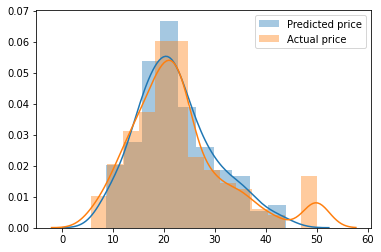

In [104]:
#hide_input
sns.distplot(clf_rf.predict(x_test), label = 'Predicted price')
sns.distplot(y_test, label = 'Actual price')
plt.legend()
plt.show()

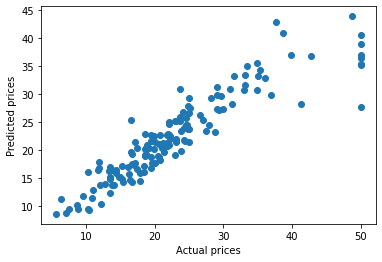

In [105]:
#hide_input
# tpot vs Baseline random forest predicion scatter plot. Shows how different thhe predictions are
plt.scatter(y_test,preds)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
#plt.legend()
plt.show()

#### Manual implementation of  Coefficient of determination R^2
$$R^2 = 1 - \frac{S_{e}^{2}(\text{Uses fitted line})}{S_{y}^{2}(\text{From data points})}$$
where  $S_{e}^{2}$ is the sample variance of the residuals and  $S_{y}^{2}$ is the sample variance of the outputs.

In [110]:
resids = preds - y_test
# Using sample variance of residuals to calculate R^2.
1 - (np.var(resids, ddof=1))/ (np.var(y_test, ddof=1))

0.8209610683012851

In [115]:
# Sklearn computed R2. There is a slight variation in the two.
clf_rf.score(x_test, y_test)

0.8183672893142674

In [114]:
# Using machine learning definition of MSE. Gives the exact estimate.
1 - mean_squared_error(y_test, preds)/ mean_squared_error(y_test, np.repeat(np.mean(y_test), y_test.shape[0]))

0.8183672893142674

##### Limitations of R^2

R<sup>2</sup> is a proportion but can be misleading as a metric for evaluating performance of a model on a task. Another problem is that it is problematic for time-series data etc.
 
The threshold for a "good" R-squared value is highly dependent on the particular domain.
 * R-squared is **more useful as a tool for comparing models.**
 * R-squared will always increase as you add more features to the model, even if they are unrelated to the response.
 * As such, using R-squared as a model evaluation metric can lead to overfitting.
 * **Adjusted R-squared** is an alternative that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.
 * As well, R-squared depends on the same assumptions as p-values, and it's less reliable if those assumptions are violated. (Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), p-values are less reliable.)

### Adjusted R^2
is an alternative to R^2 that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.\
Defined as : $$ \text{Adj } R^2 = 1-(1-R^2)*\frac{(n-1)}{(n-p-1)} $$

Where  n = number of sample size , p = number of independent variables

In [118]:
def adj_r2_score(r2, x_test):
    """Better to extend r2"""
    adj_r2 = 1 - (1 - r2) * ((x_test.shape[0] - 1)/(x_test.shape[0] - x_test.shape[1] - 1))
    return adj_r2

adj_r2_score(clf_rf.score(x_test, y_test), x_test)

0.8012569614960462

## More reliable Evaluation metrics for regression problems

**MSE** and **MAE** and other error metrics are more suitable error metrics used in ML as the results are more directly comparable given the same scale.

MSE is less robust to ouliers in target compared to MAE.
 
 * MAE is the easiest to understand, because it's the average error.
 * MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
 * RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Time-Series Metrics
from https://otexts.com/fpp2/accuracy.html: \
A forecast method that minimises the **MAE** will lead to forecasts of the median, while minimising the **RMSE** will lead to forecasts of the mean. 

Mean Absolute Percentage Error (**MAPE**): this is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management,  [0,+∞)

 $MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$